<a href="https://colab.research.google.com/github/jcdumlao14/My-Notes-ml-zoomcamp2022/blob/main/Week3_notes_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. Machine Learning for Classification**

We'll use logistic regression to predict churn

## **3.1 Churn prediction project** (video 3.1) 

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

* The project aims to identify customers that are likely to churn or stopping to use a service. Each customer has a score associated with the probability of churning. Considering this data, the company would send an email with discounts or other promotions to avoid churning.
* TELCO company where we work and we have some customer, phone lines and internet.
* To predict and identify clients like that client that want to leave the company or churn
* Churn means stop using the services of the company and leaving somewhere could be a different to it to a comported competitor or just stopping using our services altogether
* To identify which customers are about to churn and assign everyone some score between Zero and one that tells how likely this customer is going to live
* We want to score each customer and understand what is the likelihood that they churn
* The way we approach this with machine learning is binary classification. 
binary classification: 
image.png
* Target variable yi and this formula for one  single observation X could be a future vector describing customer number i and this y is the variable that tells us whether this customer left or not
* In the formula, yi is the model's prediction and belongs to {0,1}, being 0 the negative value or no churning, and 1 the positive value or churning. The output corresponds to the likelihood of churning
* yi, in this case, can take two values so it takes zero and it can take one, zero, in this case, means let's start with one means that it's a positive example so this customer did leave the turn so it's like thing like churn, when we talked about spam so a positive example would be a message with spam and zero is the negative example it could be like no churn or no spam and thing like this, so here zero means that there is something present like the effect we want to predict in this present it could be churn, it could be spam it could be something else and  mean it's no present
* To identify users who turn
* From Xi the output of the out model is a score between 0 and 1 which is the likelihood this particular customer number i g(Xi)

## **3.2 Data preparation** (video 3.2)

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings("ignore")


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'


In [3]:
!wget $data -O data-week-3.csv 

--2022-09-23 10:31:36--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.007s  

2022-09-23 10:31:37 (133 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')


In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

* You can see a few interesting things here so first of all this senior citizen is a number, not a sting like not yes or no like in other cases it's an integer so it has values 0/1. so these total charges its an object, so it should be a number

In [9]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [10]:
pd.to_numeric(df.totalcharges)

ValueError: ignored

In [11]:
pd.to_numeric(df.totalcharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

* Then we convert the number function pandas called two numeric which takes in a series and produces it and tries to convert it.
* Convert it and you see that it complains that it **unable to parse string underscore "_"**  at this position so here it means that it doesn't just contains numbers it also contains things that aren't numbers and the reasons for that is in this dataset, space means  not available so the data is missing they denote it with a space and we replaces spaces with underscores and that was treated it as a string as an object that's why it replaced all the spaces with underscores now what we can do it we can just, how to parse this the the thing we just replace it with another number and for this is a parameter called error that you say "coerce" means ignore them as not a number **tc call it total charges**


In [12]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [13]:
tc.isnull().sum()

11

* 11 values are missing and we can take a look at what's going on here.

In [14]:
df[tc.isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,_,no
753,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,_,no
936,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,_,no
1082,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,_,no
1340,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,_,no
3331,7644-omvmy,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.85,_,no
3826,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,_,no
4380,2520-sgtta,female,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.00,_,no
5218,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,_,no
6670,4075-wkniu,female,0,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two_year,no,mailed_check,73.35,_,no


In [15]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


* See let's just look at customerid and total charges we see that indeed for all the customers the value of this total charge is missing so what we want to do is now we just want to replace this column with the converted value
* What we can do immediately is if we know that there are missing values we can just fill them with zero

In [16]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [17]:
df.totalcharges = df.totalcharges.fillna(0)

In [18]:
df.totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

* Write it back so now all the missing values are zero

In [19]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

* Have this churn variable which is yes or no machine learning for classification we are interested in not a yes, or no values we are interested in numbers
* We need here is zero or one so one is churning positive example and zero is not a negative example so for that we can find all values that are yes

In [20]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [21]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

* First five, something is yes then it gets true, if something is no it gets false and now what we can do here can replace it to with a number

In [22]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

* So this is now replaced yes and no with zero and one because we know for yes it's one the customer returned and no customer didn't insurance it's no.
* We need to write it back to churn

In [23]:
df.churn = (df.churn == 'yes').astype(int)

* Convert our churn variable into a binary column with just zeros and ones.

## **3.3 Setting up the validation framework** (video 3.3)

* Perform the train/validation/test split with Scikit-Learn

* Split into three parts train, validation, and test we already implemented this using NumPy and pandas
* 60%, 20%, 20% distribution

In [24]:
from sklearn.model_selection import train_test_split

* Execute this cell and you will see the does here left, so we are interested in specifying this test size parameter
* so get our dataframe

In [25]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)



* Our test size is 20% and we need to fix the random seeds to make sure that the results are the results reproducible
* Execute this code on your computer you get the same results
* Split function, split the data into two parts training and testing
* Test is 20% and 80% full train of the data now to we have three datasets train, validation, and test

In [26]:
len(df_full_train),len(df_test)

(5634, 1409)

* These two datafame tests we can look at their sizes we have 1,409 records of test

In [27]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [28]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

* Split this full train once again, train and validation
    Train 60%  validation 20%
* 25% of the full train dataset
* We can see that test and validation do have the same size and the training dataset is four thousand two hundred twenty-five rows

In [ ]:
#df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
330,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
4478,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
3576,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,0
32,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
1438,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
5192,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
3980,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,0
235,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values


In [31]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

* We need to get our y variable 
* to avoid accidentally using this variable

## **3.4 EDA** (video 3.4) 

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

### **Functions and methods:**

* df.isnull().sum() - retunrs the number of null values in the dataframe.
* df.x.value_counts() returns the number of values for each category in x series. The normalize=True argument retrieves the percentage of each category. In this project, the mean of churn is equal to the churn rate obtained with the value_counts method.
* round(x, y) - round an x number with y decimal places
* df[x].nunique() - returns the number of unique values in x series


In [32]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


* We actually still have the old indices

In [33]:
df_full_train = df_full_train.reset_index(drop=True)

In [34]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [35]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

* We want to do a bit of exploration/look for missing values, so we don't have any missing values
* The total charges are already fixed the missing value

In [36]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

* Now we will look at the target variable term
* We look for distribution of this variable like how many users are churning user how many are non-churning for that using the value counts function
* We look at each value it looks how many times this value occurs so for value number zero occurs four thousand something times and value number one occurs one thousand five hundred something times, that we can already see the number of churned users is like three times less approximately the number of non-churn users

In [37]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

* We can look at the percentage using these normalized true keywords divides by the number we have by the total count of elements in this series so we see that 26% of users are churning users, the thing here is called churn rate, 26%, 27% our global churn rate actually we don't need to use these value to calculate it.

In [38]:
df_full_train.churn.mean()

0.26996805111821087

* Simple compute the mean of the churn column mean and it gives us the same churn rate

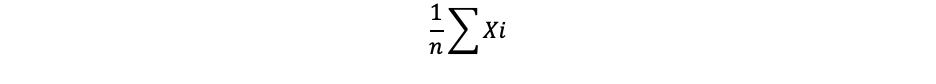



* formula for computing means is the sum over all values divided by n where n is number total number of observations since this thing can only take values from zero or not one (0,1), so this sums 

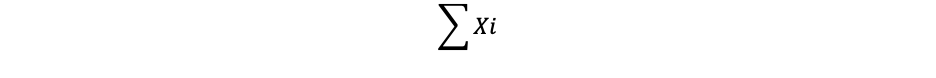

the  number of ones and this formula is number of ones divided by n equal to churn rate or a fraction of once in our dataset

In [39]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

* The global_churn rate dataset which is approximately 27% if round it 

In [40]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)
global_churn_rate

0.26996805111821087

* 27% are our users are churning

In [41]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

* How our target variable looks like/ look for other variable categorical variable and the numerical variables
* We are interested in tenure, monthly charges, total charges
* Create a list call numeric variables are tenure, monthly charges, and total charges

In [42]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [43]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

* just copy and paste the categorical variable then just remove the numerical variable on it

In [44]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

* Now we have our list of categorical variables

In [45]:
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [46]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

* This is where we select a subset from the dataframe all the categorical variables and then there is a function called **nunique** which will calculate the number of unique values for each column, most of them are binary

## **3.5 Feature importance: Churn rate and risk ratio**(video 3.5)

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

### Functions and methods:

* df.groupby('x').y.agg([mean()]) - returns a datframe with mean of y series grouped by x series
* display(x) displays an output in the cell of a jupyter notebook.


### **Churn rate**

**Churn rate:** Difference between mean of the target variable and mean of categories for a feature. If this difference is greater than 0, it means that the category is less likely to churn, and if the difference is lower than 0, the group is more likely to churn. The larger differences are indicators that a variable is more important than others.

In [47]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [48]:
df_full_train[df_full_train.gender == 'female']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
5,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
9,1732-vhubq,female,1,yes,yes,47,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,no,bank_transfer_(automatic),70.55,3309.25,1
11,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
13,1374-dmzui,female,1,no,no,4,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,94.30,424.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,8065-ykxkd,female,0,no,no,10,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.75,799.65,1
5619,5627-tvbpp,female,0,no,yes,35,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,credit_card_(automatic),20.10,644.50,0
5626,3262-eidhv,female,0,yes,yes,72,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,credit_card_(automatic),84.70,5893.90,0
5627,7446-sfaoa,female,0,yes,no,37,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,717.50,0


* We can look at the churn rate within each group example gender of all female customers this way we select a subset of customers

In [49]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [50]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male


0.2632135306553911

In [51]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [52]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

* We can see what kind of values are there so we have customers who live with partners and customers who live wihtout partner
* It's significantly less than the global rate

In [53]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [54]:
global_churn - churn_partner

0.06493474245795922

* Is  approximately five percent more for people and without partners than the global churn rate, we have something similar it's like six seven percent less than the global churn rate
* We can see the difference between global churn and churn will people who have a partner and we see that the difference is six and a half percent

In [55]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [56]:
global_churn - churn_no_partner

-0.05984095297455855

* No partner we see that the difference is negative it's almost six percent so this kind of, gives us an intuition that for gender it doesn't matter customer is male or female churn rate is approximately the same

In [57]:
global_churn - churn_female

-0.006855983216553063

In [58]:
global_churn - churn_male

0.006754520462819769

* The churn_female and churn_male is tiny

### Feature Importance

## Difference

GLOBAL -  < 0 = More likely to churn    
 
GROUP -  > 0 = Less likely to churn

* Churn group it this difference is higher than zero it means that the global churn rate is greater than the group churn rate it means that this group is less likely to churn, on the other hand, if the difference is negative it means that group churn is higher than the global churn rate and it means that this group they are more likely to churn
* The gender variable if it is positive and negative but is very tiny


### **Risk ratio**

**Risk ratio:** Ratio between mean of categories for a feature and mean of the target variable. If this ratio is greater than 1, the category is more likely to churn, and if the ratio is lower than 1, the category is less likely to churn. It expresses the feature importance in relative terms.

In [59]:
churn_no_partner / global_churn

1.2216593879412643

In [60]:
churn_partner / global_churn

0.7594724924338315

* Customer without partner calculate that we divide one by another, we can see that one higher and for people with a partner the churn rate is smaller than one
* People without a partner seem more likely to charge this ratio is greater than one
        
* RISK = **GROUP > 1 more likely to churn** / **GLOBAL < 1 less likely to churn**
* Another future importance metric is a risk ratio
* Risk, in this case, is we divide the group churn rate we divide by the global churn rate and it is greater than one more likely to churn, it is less than one less likely to churn
* These two thing differences in risk ratio they're very similar so they're kind of telling us the same information but they're telling us in a different way
* They have the same risk ratio

* The difference between this average churn rate and the global churn rate

In [ ]:
"""SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
"""

In [61]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

* let's calculate this kind of risk and take this SQL query and translate it into pandas
* We want to calculate the average churn

In [62]:
df_full_train.groupby('gender').churn.agg(['mean'])

,mean
gender,
female,0.276824
male,0.263214


* It takes a different aggregation that we can perform here, we can also add count, we have different values for this variable gender there, so we can see that it's approximately the same for females and males

In [63]:
df_full_train.groupby('gender').churn.agg(['mean','count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


* We can also add count, we have different values for this variable gender there, so we can see that it's approximately the same for females and males

In [64]:
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] =df_group['mean'] - global_churn
df_group['risk'] =df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [65]:
from IPython.display import display

In [66]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


* We could not see the output but here because it's within the loop it doesn't display it
* We use the special function for displaying thing it lives in ipython and jupyter used ipython notebooks that's why the name is still there so print the variable and add a few line breaks

## **3.6 Feature importance: Mutual information**(video 3.6)

**Mutual information** is a concept from information theory, which measures how much we can learn about one variable if we know the value of another. In this project, we can think of this as how much do we learn about churn if we have the information from a particular feature. So, it is a measure of the importance of a categorical variable.

* https://en.wikipedia.org/wiki/Mutual_information

## Classes, functions, and methods:

* mutual_info_score(x, y) - Scikit-Learn class for calculating the mutual information between the x target variable and y feature.
* df[x].apply(y) - apply a y function to the x series of the df dataframe.
* df.sort_values(ascending=False).to_frame(name='x') - sort values in an ascending order and called the column as x.



* It quantifies the amount of information that we get about one variable by observing another variable
* How much do we learn about churn if they observe the value of the contract if this particular customer has a month-to-month contract how much do we know about churn
* Kind of relationship we are interested in and mutual information which is defined like there's a formula, we just need the intuition is the higher mutual information is the more we learn about the chart by observing the value of another variable

In [67]:
from sklearn.metrics import mutual_info_score

In [68]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

* What is the label we're interested in our target variable so labels are true the target variable is a term and another variable that we know like a feature let's say contract.

In [69]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [70]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [71]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [72]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [73]:
df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

* This is what we get so far each column from this list applies the module information score and returns the results what we want to do now is we want to  order this to sort it such that the most important ones come first

In [74]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values()

gender              0.000117
phoneservice        0.000229
multiplelines       0.000857
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
paperlessbilling    0.017589
streamingmovies     0.031581
streamingtv         0.031853
paymentmethod       0.043210
deviceprotection    0.043453
onlinebackup        0.046923
internetservice     0.055868
techsupport         0.061032
onlinesecurity      0.063085
contract            0.098320
dtype: float64

In [75]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=True)

gender              0.000117
phoneservice        0.000229
multiplelines       0.000857
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
paperlessbilling    0.017589
streamingmovies     0.031581
streamingtv         0.031853
paymentmethod       0.043210
deviceprotection    0.043453
onlinebackup        0.046923
internetservice     0.055868
techsupport         0.061032
onlinesecurity      0.063085
contract            0.098320
dtype: float64

In [76]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

* Now it sorts everything, most important ones to come first **"true"**, the least important ones to come last **"false"**
* First six variables are very important they have a very high score, we are interested in this variable is why machine learning works

## **3.7 Feature importance: Correlation**(video 3.7)

**Correlation coefficient** measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables.

Functions and methods:

* df[x].corrwith(y) - returns the correlation between x and y series.

How about numerical columns?

* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

* Here we talk about the numerical variable for that circulation or also known as the Pearson correlation coefficient this is to measure dependency between two variables this is a way of measuring the degree of dependency between two variables
* We have a variable x and variable y so both these variables are numbers the correlation coefficient usually is denoted by a letter r is a number between minus one and one so for negative correlation when values of x grow usually what happens it the values of y they go down in case the correlation is negative increasing one variable leads to decrease in another variable and when the correlation is positive.
* Negative correlation between 0 and minus 0.1 so the correlation is always almost nonexistent so let's say it's low, very low it means that for positive correlation when one variable increases only very **"rarely"** it leads to an increase in the other variable, example 0.0 -0.2, 0 0.2 is low, -0.2 -0.5, 0.2 0.5 this is a **moderate correlation** the value increase in one variable, **"sometimes"** lead to increasing another variable
* -0.6 -1.2, a  0.6 1.0, this is **very strong correlation** almost always increasing one  lead to increase another in the other or increasing one lead to decreasing in other, so let's say **"often"** or like when it's close to one when it's higher the 0.49 it's almost **"always"**


* y is a binary variable which means it can take only values between 0 and 1 and X can be any number
* Use this notation X is a real number meaning it can be anything between minus infinity and plus infinity to make it more concrete and say x be tenure which is the number of months clients spent with us and why is churn, tenure is a variable
* Positive - more tenure = higher churn
* Negative - more tenure = less churn
* Zero - no effect = no churn

In [77]:
df_full_train.tenure.max()

72

* X tenure 72, y churn (0,1) in this case the positive correlation between X and y  means that when X increases **more tenure** then **more churn** it means the larger the value of X, r the  higher the churn rate **higher churn**
* Negative correlation means more tenure less churn

In [78]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [79]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

* We get these values of tenure is negative and total charges are negative so the way we can interpret the negative coefficient here is that when tenure increases continue increases so the longer customer stays with us the less likely they churn, so with the increase of tenure churn rate goes down
* Same as total charges the more people pay the less likely to live this might sound counter-intuitive but this tenure and total charges can relate to the longer people stay with a company the higher the total bill is, that's why we see that correlation is negative here
* when  we talk about monthly charges the way we interpret it here the coefficient is positive the higher the monthly charges are the most likely people are to live, increase in monthly charges will lead to an increase in churn rate and we can check this in code.

In [80]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

* The churn rate is 59 percent pretty high so if somebody stayed with the company zero for one or two months the churn rate in this group is pretty high.

In [81]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

* Let's say we want to take a look at the people who spent more than two months in the company.

In [82]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

* To check the people who stay with the company between two and 12 months, the churn rate is still pretty high almost 40 percent

In [83]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

* Finally we can take a look at people who stayed with a company longer than one year so far the churn rate is even lower it's only 17 percent

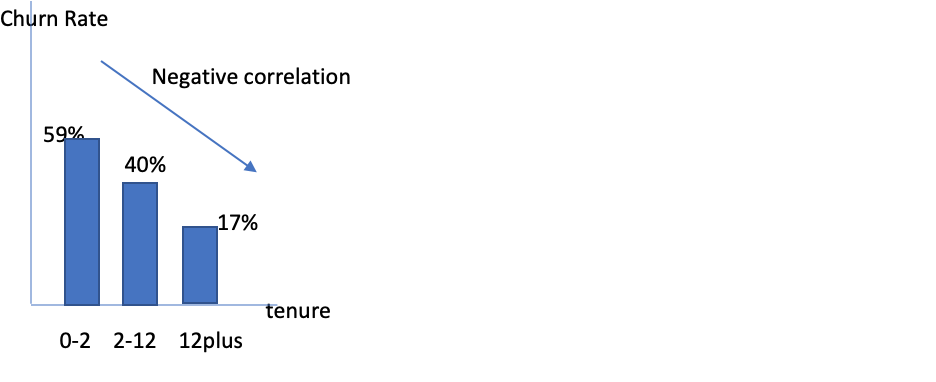

* For tenure between zero and two months, we have a churn rate like almost sixty percent to be exact is fifty-nine percent this is between zero and two month
* For tenure between two months and twelve months we have a churn rate of forty percent this is between 2 and 12 months
* Finally for people who are longer than one year it is 17 percent it's more than two times so we see here this trend that like it really down with continue increases so it's 12 plus where it increases the churn rate really goes down

In [84]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

* For less than 20 dollars per month the churn rate is slightly less than nine percent

In [85]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

* Monthly charges between 20 dollars and 50 dollars per month the churn rate is 18 percent

In [86]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

* Monthly charges more than 50 dollars per month the churn rate is 32 percent

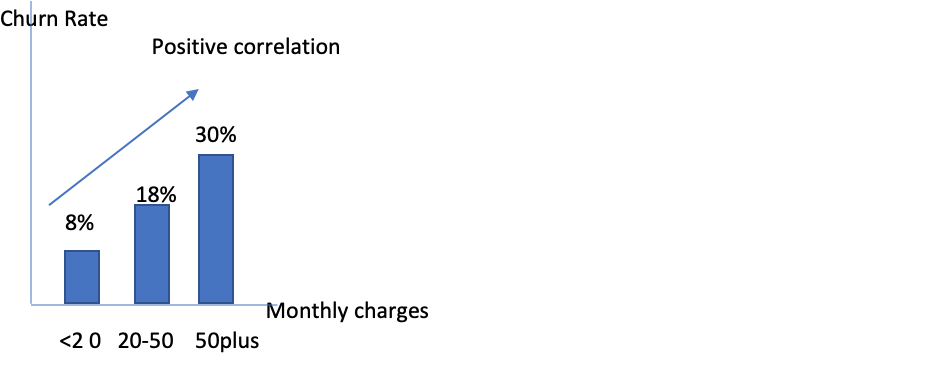

* Draw it here churns rate for monthly charges for less than 20 dollars we have an eight percent churn rate low value
* For between 20 and 50 dollars we have 18 percent
* Last we have a 30 percent this churn rate for more than 50 plus
* For tenure, this is a negative correlation and for the monthly charge is a positive correlation
* When correlation is a positive increase in charge leads to an increase in churn rate and one correlation is increasing tenure leads to a decrease in churn rate, the strength of the correlation is what our correlation coefficient tells us how often an increase in tenure leads to decrease in churn rate and increase in monthly charge leads to an increase in churn rate

In [87]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

* Tenure ordered already, the most important one, the most important numerical variable then monthly charges is the next important and the total charge is the least important one, how we understand the numerical variables affect our target variable churn

## **3.8 One-hot encoding** (video 3.8)

**One-Hot Encoding** allows encoding categorical variables in numerical ones. This method represents each category of a variable as one column, and a 1 is assigned if the value belongs to the category or 0 otherwise.

## Classes, functions, and methods:

* df[x].to_dict(oriented='records') - convert x series to dictionaries, oriented by rows.
* DictVectorizer().fit_transform(x) - Scikit-Learn class for converting x dictionaries into a sparse matrix, and in this way doing the one-hot encoding. It does not affect the numerical variables.
* DictVectorizer().get_feature_names() - returns the names of the columns in the sparse matrix.

* Use Scikit-Learn to encode categorical features

In [88]:
from sklearn.feature_extraction import DictVectorizer

In [89]:
df_train[['gender','contract']]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
4220,male,one_year
4221,male,month-to-month
4222,male,month-to-month
4223,female,two_year


In [90]:
df_train[['gender','contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


* So we have this small dataframe

In [91]:
df_train[['gender','contract']].iloc[:10].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month'}}

In [92]:
df_train[['gender','contract']].iloc[:10].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

* If we want to have row-wise
* If we want to turn it into dictionaries

In [93]:
dicts = df_train[['gender','contract']].iloc[:10].to_dict(orient='records')

In [94]:
dv = DictVectorizer(sparse=False)

In [95]:
dv.fit(dicts)

DictVectorizer(sparse=False)

* DictVectorizer so we first create a new instance of this class, we need here is the method fit so first we train our dictvectorizer and we fit it

In [ ]:
#dv.transform(dicts)

<10x4 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

* list transform so here it produces a sparse matrix is a special way of encoding data when there are many zeros
* Sparse matrix is used for compressed space raw format

In [96]:
dv.transform(dicts)

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.]])

In [97]:
dicts = df_train[['gender','contract']].iloc[:100].to_dict(orient='records')

In [98]:
dv = DictVectorizer(sparse=False)


In [99]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [100]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [101]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

* The first three columns are for contract and last two are for gender, we get these values activated one, one and the value the rest are zeros

In [102]:
df_train[['gender','contract','tenure']].iloc[:100]

,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
...,...,...,...
95,male,one_year,39
96,female,month-to-month,19
97,male,month-to-month,21
98,male,one_year,43


In [103]:
dicts = df_train[['gender','contract','tenure']].iloc[:100].to_dict(orient='records')

In [104]:
dicts[0]

{'gender': 'female', 'contract': 'two_year', 'tenure': 72}

In [105]:
dv = DictVectorizer(sparse=False)

In [106]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [107]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [108]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

In [109]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [110]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

* We have all the values here from gender to total charges all the values from datafame that we have and record in our list of dictionaries look like

In [111]:
dv = DictVectorizer(sparse=False)

In [112]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [113]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

* Our feature names are quite large here you see each categorical variable here is a group of binary variables these are the feature names

In [114]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [115]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [116]:
dv = DictVectorizer(sparse=False)

In [117]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [118]:
X_train.shape

(4225, 45)

In [119]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## **3.9 Logistic regression** (video 3.9)

* Binary classification
* Linear vs logistic regression

In general, supervised models follow can be represented with this formula:

image.png

Depending on what is the type of target variable, the supervised task can be regression or classification (binary or multiclass). Binary classification tasks can have negative (0) or positive (1) target values. The output of these models is the probability of xi belonging to the positive class.


Logistic regression is similar to linear regression because both models take into account the bias term and weighted sum of features. The difference between these models is that the output of linear regression is a real number, while logistic regression outputs a value between zero and one, applying the sigmoid function to the linear regression formula.

image.png


image.png

In this way, the sigmoid function allows transforming a score into a probability.

In [120]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [121]:
z = np.linspace(-5, 5, 15)

In [122]:
sigmoid(z)

array([0.00669285, 0.01357692, 0.02734679, 0.05431327, 0.10500059,
       0.19332137, 0.32865255, 0.5       , 0.67134745, 0.80667863,
       0.89499941, 0.94568673, 0.97265321, 0.98642308, 0.99330715])

In [123]:
sigmoid(10000)

1.0

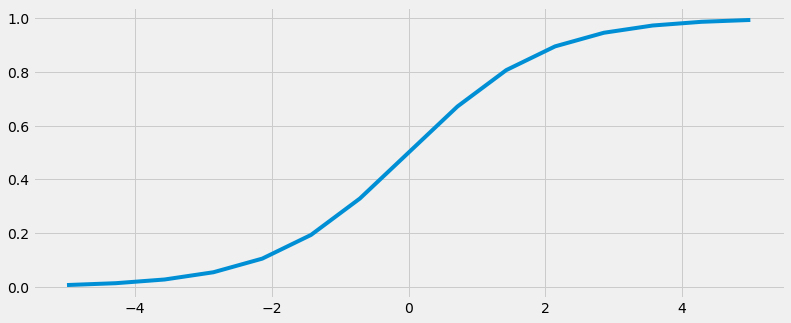

In [124]:
plt.plot(z, sigmoid(z))

In [125]:
z = np.linspace(-7, 7, 51)

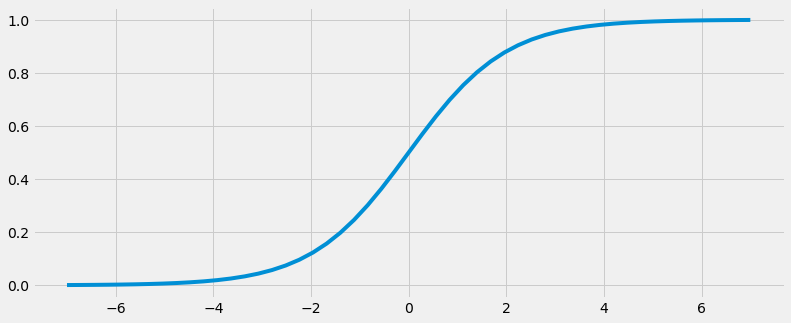

In [126]:
plt.plot(z, sigmoid(z))

In [127]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [128]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## **3.10 Training logistic regression with Scikit-Learn**(video 3.10)

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

This video was about training a logistic regression model with Scikit-Learn, applying it to the validation dataset, and calculating its accuracy.

### Classes, functions, and methods:

* LogisticRegression( ).fit_transform(x) - Scikit-Learn class for calculating the logistic regression model.
* LogisticRegression( ).coef_[0] - returns the coeffcients or weights of the LR model
* LogisticRegression( ).intercept_[0] - returns the bias or intercept of the LR model
* LogisticRegression( ).predict[x] - make predictions on the x dataset
* LogisticRegression( ).predict_proba[x] - make predictions on the x dataset, and returns two columns with their probabilities for the two categories - soft predictions


In [129]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

In [130]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [131]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

* These are the weights the w so we see it's a two-dimensional array with just one row

In [132]:
model.intercept_[0]

-0.10903461122930498

In [133]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

* Use the function called predict use it for our train dataset, predict zero and once so in this case zero is a significant one
* This we call **hard predictions** because they already have the exact label

In [134]:
model.predict_proba(X_train)

array([[0.90451531, 0.09548469],
       [0.32067017, 0.67932983],
       [0.36632206, 0.63367794],
       ...,
       [0.46838428, 0.53161572],
       [0.95746004, 0.04253996],
       [0.30127008, 0.69872992]])

* We use probability function - predict proba which stands for predict probability
* These are the **soft predictions**
* By soft we mean here that it's not just a  number zero or one but a score, this two-dimensional matrix
* Two columns the first one is the probability of being negative, negative class, and the second one is the probability of belonging to a positive class is the probability of churning
* For example this person has a 50% probability of churning and another one has a 46% probability of non-churning

In [135]:
model.predict_proba(X_train)[:,1]

array([0.09548469, 0.67932983, 0.63367794, ..., 0.53161572, 0.04253996,
       0.69872992])

* The negative part is we don't need it we just take the first column of the predictions
* This would be soft predictions because it's not like a hard decision we now can use this to decide above each threshold we treat people as churning

In [136]:
y_pred = model.predict_proba(X_val)[:,1]

In [137]:
y_pred

array([0.00899598, 0.20452238, 0.21222245, ..., 0.13638428, 0.79976953,
       0.83740736])

* We get this array with predictions and now we can make this so-called hard decision.

In [138]:
y_pred >= 0.5

array([False, False, False, ..., False,  True,  True])

* For people above a certain threshold  and for us, it can be 0.5 the default threshold here when we do predict is 0.5, this is what the model is used by default we get a binary array with predictions that is false means that this customer is not churning and true means that this customer is churning

In [141]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

* Let's call it churn decision

In [142]:
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


* We can select all the customers that are think they are going to churn

In [143]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

* These are the people that will receive promotional emails with some discount of 25 percent, our model thinks that they will churn so let's send them some discount
* How accurate our predictions are for regression we used rmse as a way to measure the performance of our model to see how good it is

In [144]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [145]:
churn_decision.astype(int)


array([0, 0, 0, ..., 0, 1, 1])

* Which tells us how many correct predictions we made this is fairly easy to implement well, we can just see how many of them match
* how many in total and how many of them are matching

In [146]:
y_val == churn_decision

array([ True,  True,  True, ...,  True,  True,  True])

* If the number match true and false if they don't match

In [147]:
(y_val == churn_decision).mean()

0.8034066713981547

* We see that 80 percent of our predictions match

In [149]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [150]:
df_pred

,probability,prediction,actual
0,0.008996,0,0
1,0.204522,0,0
2,0.212222,0,0
3,0.543045,1,1
4,0.213785,0,0
...,...,...,...
1404,0.313661,0,0
1405,0.039356,0,1
1406,0.136384,0,0
1407,0.799770,1,1


* Which customer had the predictions and has the actual value

In [151]:
df_pred['correct'] = df_pred.prediction == df_pred.actual


In [152]:
df_pred

,probability,prediction,actual,correct
0,0.008996,0,0,True
1,0.204522,0,0,True
2,0.212222,0,0,True
3,0.543045,1,1,True
4,0.213785,0,0,True
...,...,...,...,...
1404,0.313661,0,0,True
1405,0.039356,0,1,False
1406,0.136384,0,0,True
1407,0.799770,1,1,True


* Let's take a look at this dataframe we have another column each time it matches each time it's the same it's true and when it's not correct and actually for this person we thought that probability is super tiny it's like thirty-four percent but this person still left this we didn't get it

In [ ]:
df_pred.correct.mean()

0.8034066713981547

* Eighty percent correct which means that in eighty percent of the cases when the model says a person is going to churn or not going to churn this is true so the model is correct and for the domain and twenty percent the model is saying that okay

In [ ]:
df_pred.correct

0        True
1        True
2        True
3        True
4        True
        ...  
1404     True
1405    False
1406     True
1407     True
1408     True
Name: correct, Length: 1409, dtype: bool

## **3.11 Model interpretation** (video 3.11)

* Look at the coefficients
* Train a smaller model with fewer features

In the formula of the logistic regression model, only one of the one-hot encoded categories is multiplied by 1, and the other by 0. In this way, we only consider the appropriate category for each categorical feature.

### Classes, functions, and methods:

* zip(x,y) - returns a new list with elements from x joined with their corresponding elements on y


In [156]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [157]:
dv = DictVectorizer(sparse=False)

In [159]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [160]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [161]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [162]:
a = [1, 2, 3, 4]
b = 'abcd'

In [166]:
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [163]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [164]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [165]:
small = ['contract', 'tenure', 'monthlycharges']

In [169]:
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [167]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [168]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [170]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [171]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [177]:
X_train_small = dv_small.transform(dicts_train_small)

In [178]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [180]:
model_small.intercept_[0]

-2.476775663985754

In [181]:
model_small.coef_[0]

array([ 0.97004492, -0.0251365 , -0.94872201,  0.02748236, -0.03618424])

In [182]:
w0 = model_small.intercept_[0]
w0

-2.476775663985754

In [183]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [184]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [187]:
sigmoid(-2.7)

0.06297335605699649

* This very low probability by default

In [188]:
sigmoid(-2.7 + 0.97)

0.1505875797458439

* We learned the customer has a monthly contract the probability of churning this customer just grows bigger 

In [190]:
sigmoid(-2.47 + 0.97 + 50 * 0.027)

0.46257015465625034

* Now the probability is almost 46%

In [191]:
sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036))

0.41824062315816374

In [193]:
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

* Let's see the row score is -0.3300

In [194]:
sigmoid(_)

0.41824062315816374

* The probability is 41% and the underscore here **(_)** means to take what every output of the previous cell was and put it in a parameter, underscore just like a magic variable

In [195]:
-2.47 + 0.97 + 60 * 0.027 + 1 * (-0.036)

0.08399999999999966

* The score becomes positive remember sigmoid zero we get 0.5 

In [196]:
sigmoid(_)

0.5209876607065322

* The score of sigmoid 52% is not pretty high, we take these users are churning

In [197]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

* For The 2 year contract probability is -3.472

In [198]:
sigmoid(_)

0.030090303318277657

## **3.12 Using the model**(video 3.12)

We trained the logistic regression model with the full training dataset (training + validation), considering numerical and categorical features. Thus, predictions were made on the test dataset, and we evaluate the model using the accuracy metric.

In this case, the predictions of validation and test were similar, which means that the model is working well.

In [199]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [200]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [201]:
y_full_train = df_full_train.churn.values

In [202]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [203]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [204]:
X_test = dv.transform(dicts_test)

In [205]:
y_pred = model.predict_proba(X_test)[:, 1]

In [206]:
churn_decision = (y_pred >= 0.5)

In [207]:
(churn_decision == y_test).mean()

0.815471965933286

In [208]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [209]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [210]:
X_small = dv.transform([customer])

In [211]:
model.predict_proba(X_small)[0, 1]

0.5968852088243913

In [212]:
y_test[-1]

1

In [213]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [214]:
X_small = dv.transform([customer])

In [215]:
X_small.shape

(1, 45)

In [216]:
model.predict_proba(X_small)

array([[0.5943189, 0.4056811]])

In [217]:
model.predict_proba(X_small)[0,1]

0.4056810977859304

In [218]:
y_test[10]

0

## **3.13 Summary**(video 3.13)

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with DictVectorizer
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

## **3.14 Explore more**

More things

* Try to exclude least useful features

Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Happy Learning!!